In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import models, data_loader
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt
from explore_latent_space import latent_phase_plot, latent_distribution, sample_from_norm, prediction_plots

In [3]:
LATENT_DIM = 2  # visualising in 2d so only works when models are trained with 2 dims for latent space

# image post-processing. Thresholds to create 3 different bands of pixel values {0, 0.7, 1}
THRESH_LOW = 0.4
THRESH_HIGH = 0.6
MID_PIXEL = 0.7

autoencoder_name = Path('models/auto_e30')
vae_name = Path('models/vae_c0.5_e30')
batch_size=64
hidden_dim = 200

In [ ]:
# setup dataloader and model templates
_, dataloader = data_loader.CustomDataloaders.MNIST(batch_size=batch_size)
model_auto = models.AutoencoderFc(hidden_dim=hidden_dim, latent_dim=LATENT_DIM)
model_vae = models.VaeFc(hidden_dim=hidden_dim, latent_dim=LATENT_DIM)

# load pre-trained models from save states
# to train the models see README
model_auto.load_state_dict(torch.load(autoencoder_name))
model_vae.load_state_dict(torch.load(vae_name))
model_auto.eval()
model_vae.eval()

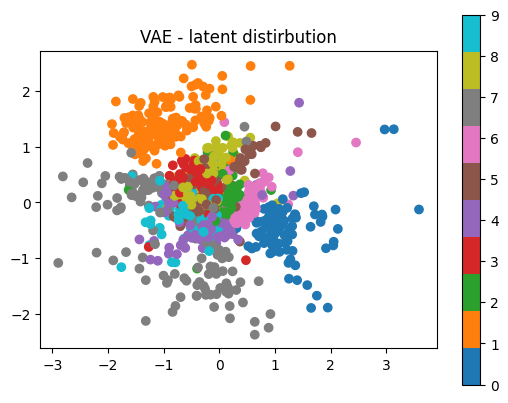

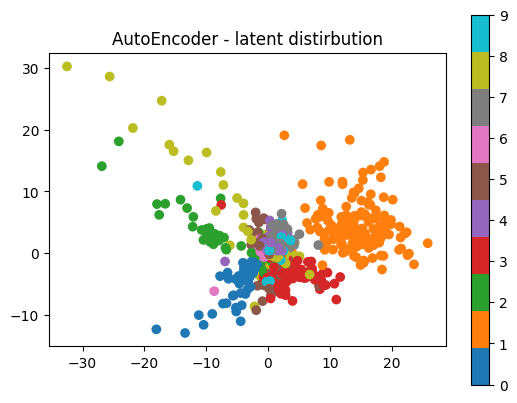

In [5]:
# plot encoded inputs into latent space coloured by it's label (digit number)
latent_distribution(model_vae, is_vae=True, dataloader=dataloader, nb_batches=20, batch_size=64)
plt.title('VAE - latent distirbution')
plt.show()
latent_distribution(model_auto, is_vae=False, dataloader=dataloader, nb_batches=20, batch_size=64)
plt.title('AutoEncoder - latent distirbution')
plt.show()

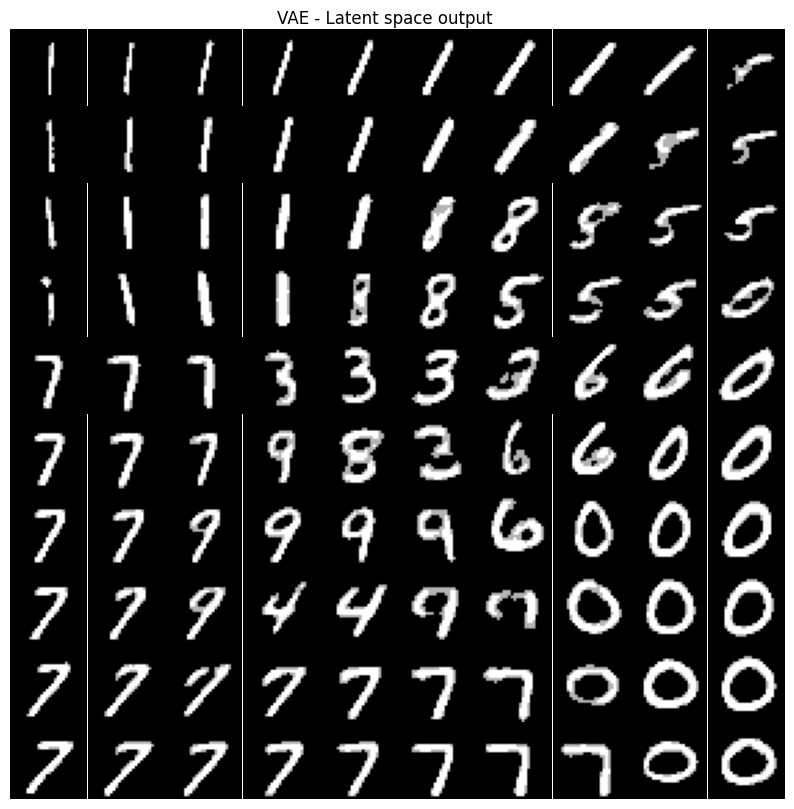

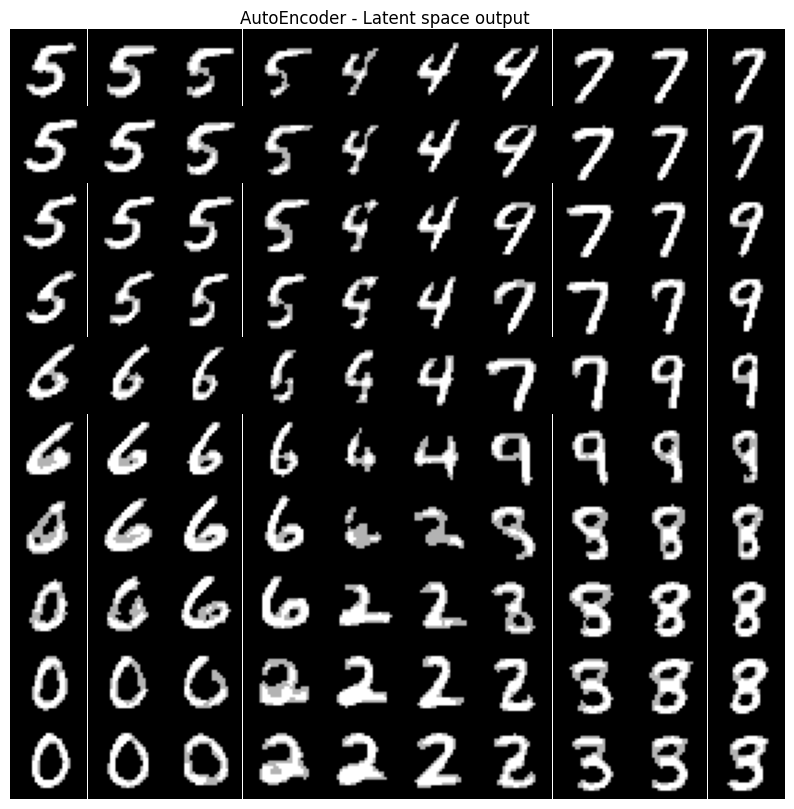

In [6]:
# Similar to the above, but show the generated digit from the latent space point
latent_phase_plot(model_vae, is_vae=True, max_range=2)
fig = plt.gcf()
fig.suptitle('VAE - Latent space output', y=0.9)
plt.show()

latent_phase_plot(model_auto, is_vae=False, max_range=2)
fig = plt.gcf()
fig.suptitle('AutoEncoder - Latent space output', y=0.9)
plt.show()

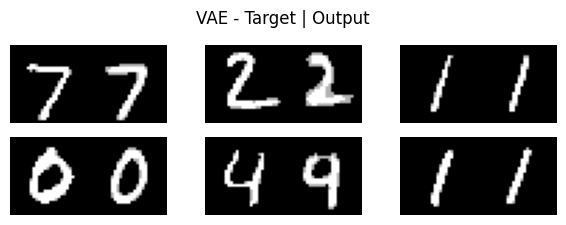

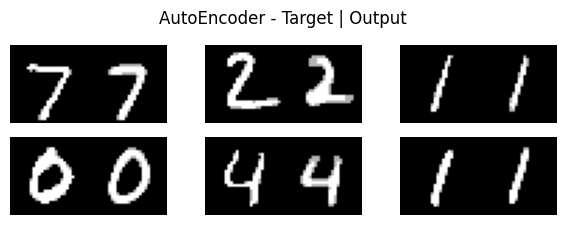

In [7]:
# generate a number of examples as target | output pairs. Note: the input and the target are the same
prediction_plots(model_vae, dataloader=dataloader, is_vae=True)
fig = plt.gcf()
fig.suptitle('VAE - Target | Output', y=1.1)
plt.show()

prediction_plots(model_auto, dataloader=dataloader, is_vae=False)
fig = plt.gcf()
fig.suptitle('AutoEncoder - Target | Output', y=1.1)
plt.show()

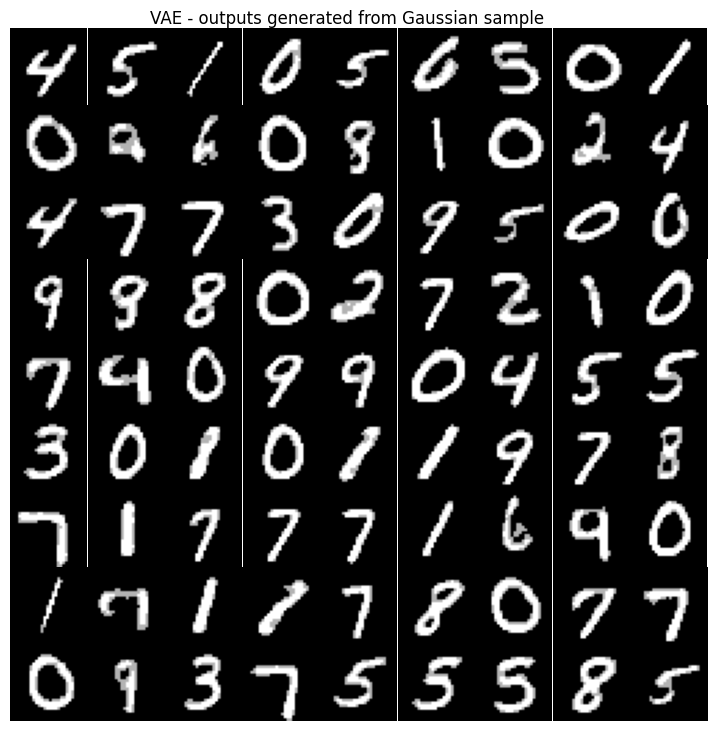

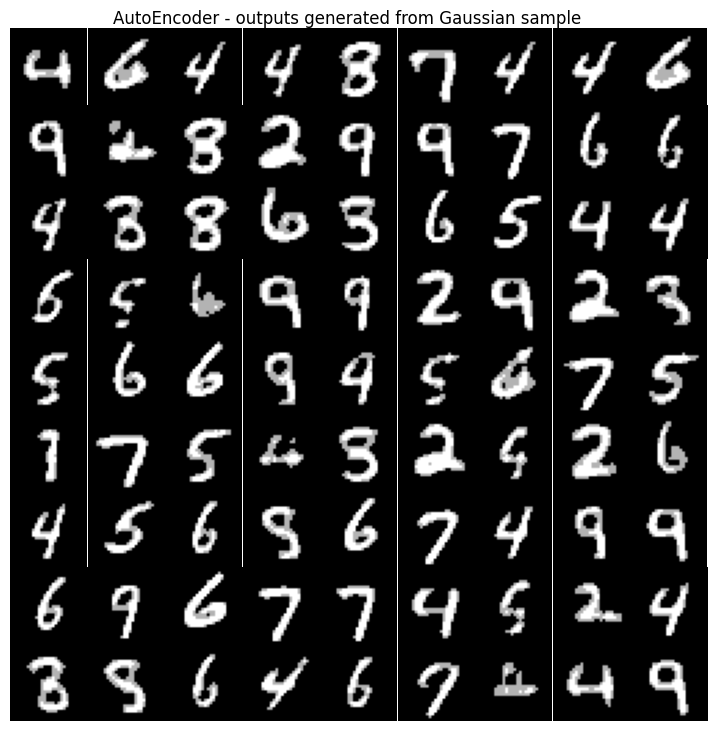

In [8]:
# Sample from a 2D normal Gaussian and generate digit outputs
sample_from_norm(model_vae, is_vae=True, dataloader=dataloader)
fig = plt.gcf()
fig.suptitle('VAE - outputs generated from Gaussian sample', y=0.9)
plt.show()

sample_from_norm(model_auto, is_vae=False, dataloader=dataloader)
fig = plt.gcf()
fig.suptitle('AutoEncoder - outputs generated from Gaussian sample', y=0.9)
plt.show()